In [1]:
import preprocess
from PSPNet.builder import PSPNet
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam

def combine(array):
    rtn_array = np.zeros_like(array[:, :, :, 0])
    for batch, _ in enumerate(array):
        for row, _ in enumerate(array[0]):
            for column, _ in enumerate(array[0, 0]):
                rtn_array[batch, row, column] = array[batch, row, column, :].argmax()
    return rtn_array

## Data inspection

In [2]:
x_train, y_train = preprocess.labeled_data(
    images_path="images/train/images/",
    labels_path="images/train/labels/",
    resize=(480, 480)
)
y_train_combined = combine(y_train)

In [3]:
x_train.shape, y_train.shape

((320, 480, 480, 3), (320, 480, 480, 23))

In [4]:
x_train_short, y_train_short = x_train[:5], y_train[:5]
y_train_short_combined = combine(y_train_short)
x_train_short.shape, y_train_short.shape

((5, 480, 480, 3), (5, 480, 480, 23))

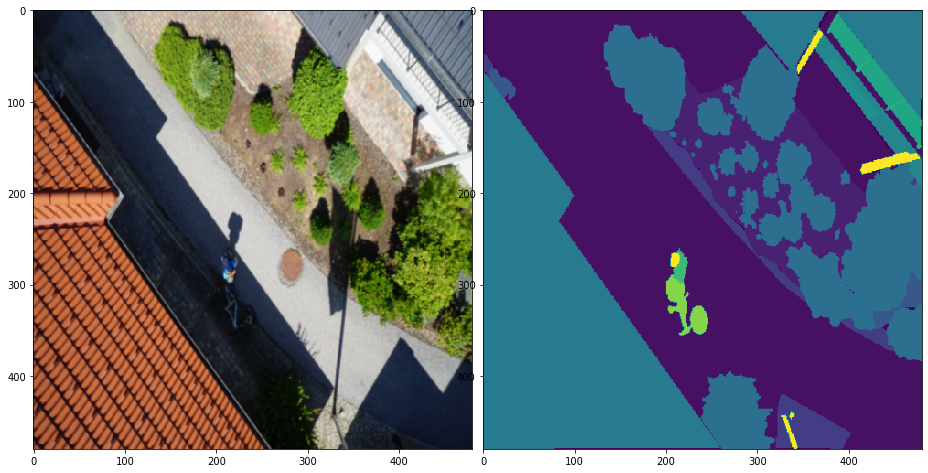

In [5]:
img = 2
plt.figure(figsize=(13, 7))
plt.subplot(121)
io.imshow(x_train_short[img])
plt.subplot(122)
plt.imshow(y_train_short_combined[img]);

## Training

In [ ]:
psp = PSPNet(
    blocks=6,
    start_filters=12
)

# # change input shape and rebuild (change module eventually to avoid this)
# psp.input_shape=(128, 128, 3)
# psp.build()

psp.net.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
# psp.net.summary()

In [ ]:
psp.net.fit(x_train_short, y_train_short, batch_size=1, epochs=2)

In [ ]:
for image_count in range(5, 321, 5)
    print(f"\nIMAGE COUNT: {image_count}")
    x_train_short, y_train_short = x_train[:5], y_train[:5]
    psp.net.fit(x_train_short, y_train_short, batch_size=1, epochs=2)